In [1]:
import os
import pandas as pd

In [2]:
l3_pre=['next_line','no']
l2_pre=['ip_stride','next_line','no']
l1_pre=['next_line','no']
replacement=['lru','ship','srrip','drrip']
trace_code = ['436','437','450','462','482']
config = [l1+'-'+l2+'-'+l3+'-'+rep  for l3 in l3_pre for l2 in l2_pre for l1 in l1_pre for rep in replacement]

In [3]:
res_list = os.listdir('res')

In [4]:
blank_list = [ [0 for i in range(len(trace_code))] for j in range(len(config))]

In [5]:
#创建空dataframe
IPC = pd.DataFrame(blank_list,index=config,columns= trace_code)

In [6]:
for trace_res in res_list:
    dir = 'res/'+trace_res+'/'
    #输出的逐个读取
    log_list = os.listdir(dir)
    for log in log_list:
        test_config = log.split('-')
        trace_code = test_config[0]
        l1_pref = test_config[1]
        l2_pref = test_config[2]
        l3_pref = test_config[3]
        repl = test_config[4].split('.')[0]
        log_config = l1_pref+'-'+l2_pref+'-'+l3_pref+'-'+repl
        with open(dir+log,'r') as f:
            lines = f.readlines()
            for line in lines:
                if line[0:8] == "Finished":
                    t = line.find("IPC")
                    res = float(line[t+5:t+12])
                    log_index = config.index(log_config)
                    IPC.loc[log_config,trace_code] = res
                    #print("score: %f"  %( float(line[t+5:t+12])))



In [7]:
IPC = IPC.sort_index()

In [8]:
IPC['avg'] = round(IPC.mean(axis=1),5) #小数保留5位

In [9]:
IPC.to_csv('IPC_origin.csv') #未排序的数据

In [10]:
IPC_sort = IPC.sort_values(by = 'avg', ascending = False)

In [11]:
IPC_sort.head()

,436,437,450,462,482,459,avg
next_line-ip_stride-next_line-drrip,0.39357,0.98802,0.37274,0.70679,1.25477,0.91745,0.77222
next_line-ip_stride-next_line-lru,0.39361,0.98675,0.37568,0.72553,1.19622,0.92179,0.76660
next_line-ip_stride-next_line-ship,0.39358,0.98839,0.38446,0.68971,1.22407,0.91511,0.76589
next_line-ip_stride-next_line-srrip,0.39375,0.98888,0.38263,0.67658,1.23575,0.91169,0.76488
next_line-ip_stride-no-ship,0.39363,0.95320,0.38524,0.67352,1.26065,0.85670,0.75382


In [12]:
IPC_sort.to_csv('IPC_sort.csv') #按照平均得分排序

<Axes: >

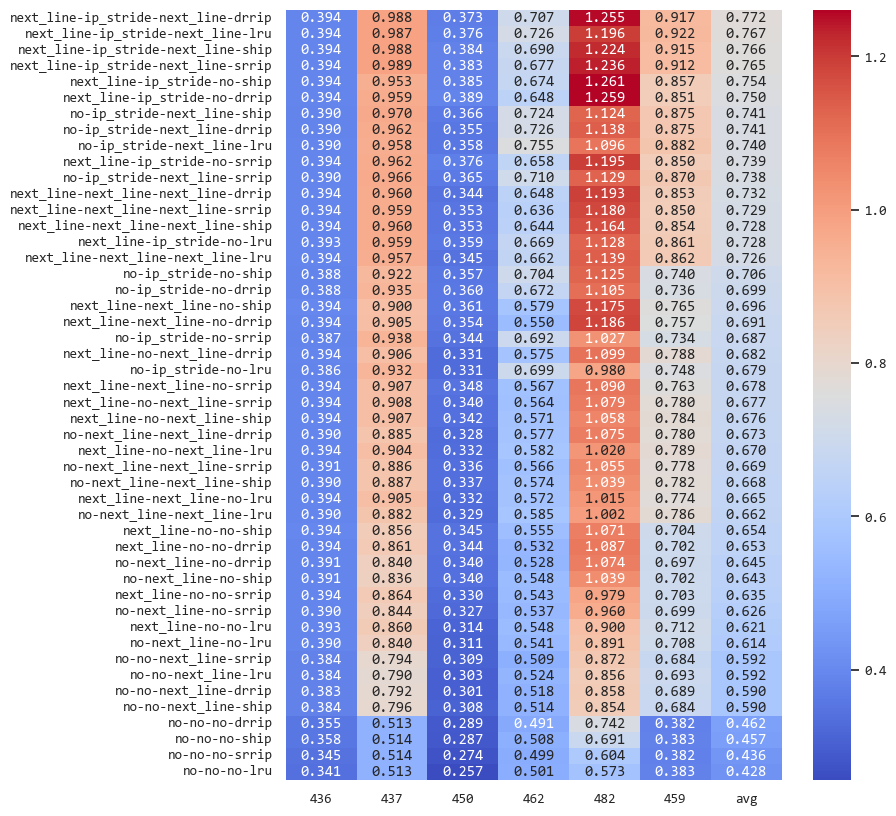

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,10))
sns.set_theme(font='Consolas',font_scale=0.9)
sns.heatmap(IPC_sort,cmap='coolwarm',annot=True,fmt='.3f')

<Axes: ylabel='avg'>

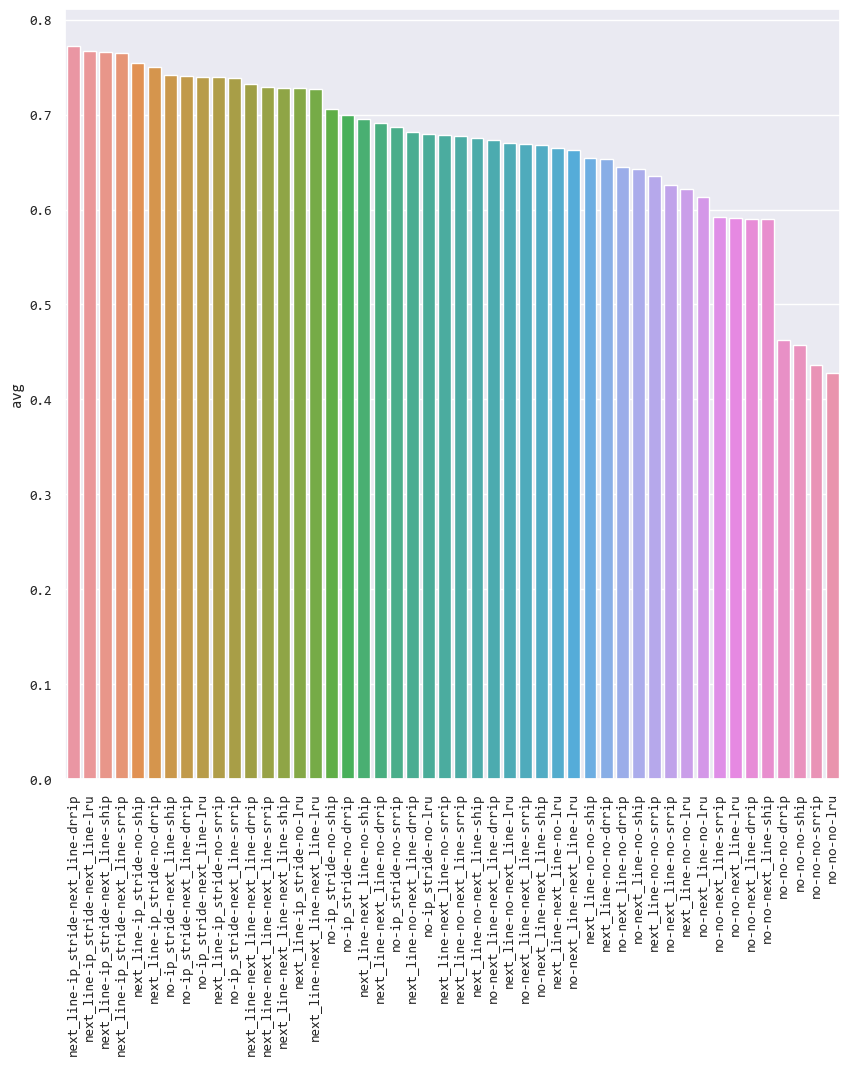

In [68]:
plt.figure(figsize=(10,10))
plt.xticks(rotation=90)
sns.barplot(x=IPC_sort.index,y=IPC_sort['avg'])

In [14]:
IPC_agg = IPC.reset_index()

In [15]:
IPC_config = IPC_agg['index'].str.split('-',expand=True)

In [16]:
IPC_config.columns = ['l1_pref','l2_pref','l3_pref','replacement']

In [17]:
IPC_detailed = pd.concat([IPC_config,IPC_agg],axis=1).drop('index',axis=1)

In [37]:
IPC_simple = IPC_detailed.drop(['436','437','450','462','482','459'],axis=1).sort_values('avg',ascending=False)
IPC_simple.head() #IPC_simple是仅保留avg数据，将各项配置细节拆分后的表格

,l1_pref,l2_pref,l3_pref,replacement,avg
0,next_line,ip_stride,next_line,drrip,0.77222
1,next_line,ip_stride,next_line,lru,0.76660
2,next_line,ip_stride,next_line,ship,0.76589
3,next_line,ip_stride,next_line,srrip,0.76488
6,next_line,ip_stride,no,ship,0.75382


In [38]:
IPC_simple.to_csv('IPC_simple.csv')

In [18]:
IPC_detailed.head()

,l1_pref,l2_pref,l3_pref,replacement,436,437,450,462,482,459,avg
0,next_line,ip_stride,next_line,drrip,0.39357,0.98802,0.37274,0.70679,1.25477,0.91745,0.77222
1,next_line,ip_stride,next_line,lru,0.39361,0.98675,0.37568,0.72553,1.19622,0.92179,0.76660
2,next_line,ip_stride,next_line,ship,0.39358,0.98839,0.38446,0.68971,1.22407,0.91511,0.76589
3,next_line,ip_stride,next_line,srrip,0.39375,0.98888,0.38263,0.67658,1.23575,0.91169,0.76488
4,next_line,ip_stride,no,drrip,0.39379,0.95948,0.38872,0.64779,1.25869,0.85137,0.74997


In [19]:
#对不同的替换策略分别计算得分
repl_score = IPC_detailed.groupby('replacement').agg({'avg':'mean'}).sort_values('avg',ascending=False)
repl_score

,avg
replacement,
drrip,0.674207
ship,0.673207
srrip,0.664353
lru,0.657691


In [20]:
repl_score.to_csv('repl_score.csv')

In [21]:
l1_pref_score = IPC_detailed.groupby('l1_pref').agg({'avg':'mean'}).sort_values('avg',ascending=False)
l1_pref_score

,avg
l1_pref,
next_line,0.706465
no,0.628264


In [22]:
l2_pref_score = IPC_detailed.groupby('l2_pref').agg({'avg':'mean'}).sort_values('avg',ascending=False)
l2_pref_score

,avg
l2_pref,
ip_stride,0.735784
next_line,0.677766
no,0.588542


In [23]:
l3_pref_score = IPC_detailed.groupby('l3_pref').agg({'avg':'mean'}).sort_values('avg',ascending=False)
l3_pref_score

,avg
l3_pref,
next_line,0.695261
no,0.639467


In [24]:
l1_pref_score.to_csv('l1_pref_score.csv')
l2_pref_score.to_csv('l2_pref_score.csv')
l3_pref_score.to_csv('l3_pref_score.csv')

In [64]:
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.4f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

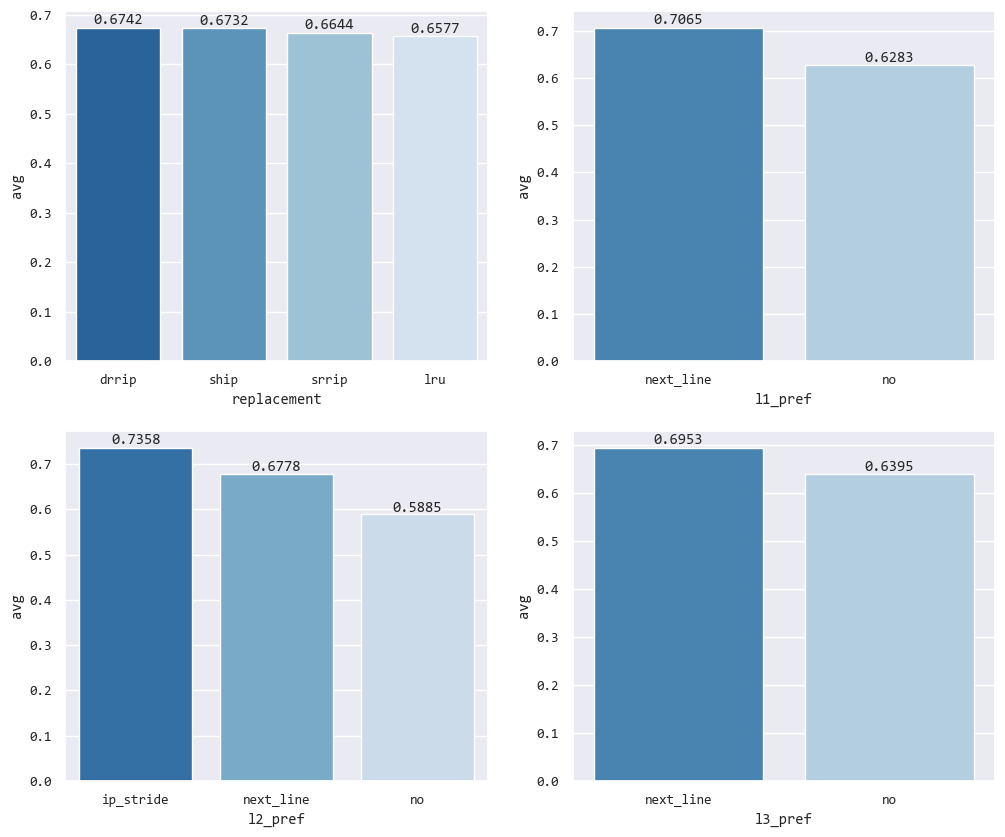

In [66]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
a = sns.barplot(y=repl_score['avg'],x=repl_score.index,ax=axes[0,0],palette='Blues_r')
show_values(a)
a = sns.barplot(y=l1_pref_score['avg'],x=l1_pref_score.index,ax=axes[0,1],palette='Blues_r')
show_values(a)
a = sns.barplot(y=l2_pref_score['avg'],x=l2_pref_score.index,ax=axes[1,0],palette='Blues_r')
show_values(a)
a = sns.barplot(y=l3_pref_score['avg'],x=l3_pref_score.index,ax=axes[1,1],palette='Blues_r')
show_values(a)


In [46]:
pref_config = IPC_detailed.groupby(['l1_pref','l2_pref','l3_pref']).agg({'avg':'mean'}).sort_values('avg',ascending=False)
pref_config

avg
l1_pref   l2_pref   l3_pref            
next_line ip_stride next_line  0.767397
                    no         0.742760
no        ip_stride next_line  0.740093
next_line next_line next_line  0.728823
no        ip_stride no         0.692887
next_line next_line no         0.682457
          no        next_line  0.676370
no        next_line next_line  0.667955
next_line no        no         0.640983
no        next_line no         0.631830
          no        next_line  0.590930
                    no         0.445887

In [47]:
pref = pref_config.reset_index()
pref['config'] = pref['l1_pref']+'-'+pref['l2_pref']+'-'+pref['l3_pref']

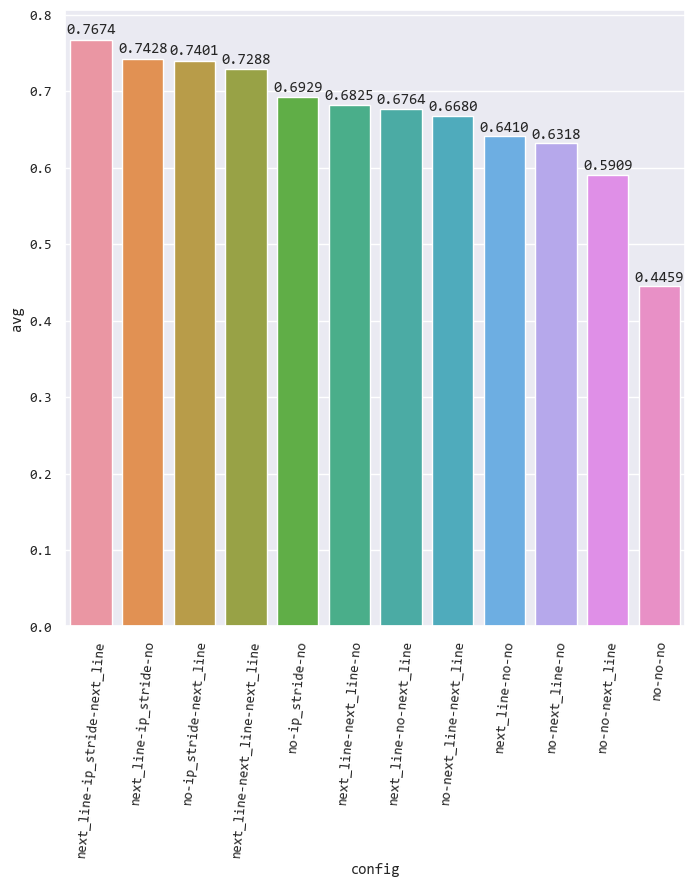

In [80]:

plt.figure(figsize=(8,8))
sns.set_theme(font='Consolas',font_scale=0.9)
plt.xticks(rotation=85)
a=sns.barplot(x=pref['config'],y=pref['avg'])
show_values(a)